**1. Import the necessary liabraries**

In [812]:
# 1. Importing all the necessary libraries and modules

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


In [813]:
# Importing the csv data file
df = pd.read_csv('/content/drive/MyDrive/CIS 9660 Data Mining /Lab4/yelp-data-lab5.csv')

In [814]:
# Making sure the data is correctly importing by calling the head (first 5 rows) of the imported file 
df.head()

,user_id,prod_id,rating,label,date,review,Year,venue
0,60609,3611,bad,1,7/12/13,horrible. I went there for a nice fresh lobste...,2013,Don Pepe II
1,121342,3528,bad,1,7/7/12,"This might be ok for a beer, but don't dare tr...",2012,Rattle ‘N’ Hum
2,102327,1378,bad,-1,11/17/12,one of the worst place to eat. We have never a...,2012,Green Chilli
3,108938,4037,bad,1,1/28/13,alfies has ok food. The manager is super nice ...,2013,Alfie’s
4,66638,2645,bad,-1,12/3/13,Love love this place! The food is great! The r...,2013,Buon Appetito


**2. Look at the distribution of the ratings (good vs bad)**

In [815]:
df['rating'].value_counts()

bad     119
good     81
Name: rating, dtype: int64

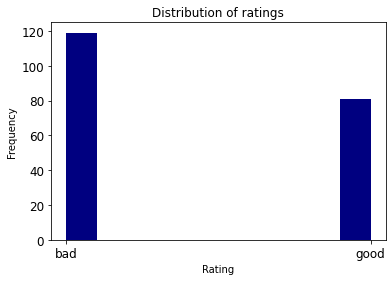

In [816]:
df['rating'].hist(xlabelsize=12,ylabelsize=12,color='navy',grid=False)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of ratings")
plt.show()

**3. Process the review text and create and build a TF-IDF and bigrams set and the original attributes. Create a new model using the new features**

In [817]:
# Creating dummy variables for the target variable
df = pd.get_dummies(df, prefix_sep='_',drop_first=True,columns=['rating'])

In [818]:
df.head()

,user_id,prod_id,label,date,review,Year,venue,rating_good
0,60609,3611,1,7/12/13,horrible. I went there for a nice fresh lobste...,2013,Don Pepe II,0
1,121342,3528,1,7/7/12,"This might be ok for a beer, but don't dare tr...",2012,Rattle ‘N’ Hum,0
2,102327,1378,-1,11/17/12,one of the worst place to eat. We have never a...,2012,Green Chilli,0
3,108938,4037,1,1/28/13,alfies has ok food. The manager is super nice ...,2013,Alfie’s,0
4,66638,2645,-1,12/3/13,Love love this place! The food is great! The r...,2013,Buon Appetito,0


In [819]:
# Creating a series to store the label y
y = df['rating_good']

In [820]:
# Creating training and testing sets with random state = 1 and test data is 30% of the data
X_train, X_test, y_train, y_test = train_test_split(df['review'], y,test_size=0.3, random_state=1)

In [821]:
# Initialize a CountVectorizer object as count_vectorizer (keeping ngrams as 1 as this is when the best results are achieved.)
count_vectorizer = CountVectorizer(ngram_range=(1, 1),stop_words = 'english')

# Transform the training data using only the 'review' column values as count_train 
count_train = count_vectorizer.fit_transform(X_train.values)

# Transform the test data using only the 'review' column values as count_test 
count_test = count_vectorizer.transform(X_test.values)

# Print the first 30 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:30])  
print(count_train.A[:5])

['00', '10', '100', '10pm', '11', '1138', '12', '13', '14', '15', '150x', '16', '17', '180', '1st', '20', '2012', '2013', '22', '23', '24', '25', '26', '2inch', '2pm', '2yr', '30', '32', '3in', '40']
[[0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [822]:
len(count_vectorizer.get_feature_names())

2337

In [823]:
# Initialize a TfidfVectorizer object as tfidf_vectorizer (Keeping n_grams as 1 as this is when the best result is achieved. this may be due to less data)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1),stop_words = 'english', max_df = 0.7)

# Transform the training data as tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

# Transform the test data as tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test.values)

# Print the first 30 features
print(tfidf_vectorizer.get_feature_names()[:30])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

['00', '10', '100', '10pm', '11', '1138', '12', '13', '14', '15', '150x', '16', '17', '180', '1st', '20', '2012', '2013', '22', '23', '24', '25', '26', '2inch', '2pm', '2yr', '30', '32', '3in', '40']
[[0.         0.28181892 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [824]:
# Creating CountVectorizer DataFrame as count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Creating TfidfVectorizer DataFrame as tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [825]:
# Print the head of count_df
count_df.head(2)

,00,10,100,10pm,11,1138,12,13,14,15,150x,16,17,180,1st,20,2012,2013,22,23,24,25,26,2inch,2pm,2yr,30,32,3in,40,43,45,4th,4yr,50,50c,51,5th,60,73,...,world,worms,worried,worries,worse,worst,worth,woudn,wouldn,wouldnt,wow,wrap,wrapped,write,writing,wrong,yale,yam,yankee,yay,yeah,year,years,yelling,yellow,yellowtail,yelp,yep,yes,yesterday,yoga,yogurt,yolked,york,yuca,yum,yummmmm,zero,zi,zia
0,0,2,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [826]:
# Print the head of tfidf_df
tfidf_df.head(2)

,00,10,100,10pm,11,1138,12,13,14,15,150x,16,17,180,1st,20,2012,2013,22,23,24,25,26,2inch,2pm,2yr,30,32,3in,40,43,45,4th,4yr,50,50c,51,5th,60,73,...,world,worms,worried,worries,worse,worst,worth,woudn,wouldn,wouldnt,wow,wrap,wrapped,write,writing,wrong,yale,yam,yankee,yay,yeah,year,years,yelling,yellow,yellowtail,yelp,yep,yes,yesterday,yoga,yogurt,yolked,york,yuca,yum,yummmmm,zero,zi,zia
0,0.0,0.281819,0.0,0.0,0.0,0.0,0.173107,0.0,0.218855,0.147866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.156222,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Building Naive Bayes Count Vectorizer**

In [827]:
# Building Naive Bayes Count_Vectorizer

nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
round(metrics.accuracy_score(y_test, pred),3)

0.867

In [828]:
# Creating a confusion matrix
metrics.confusion_matrix(y_test, pred)

array([[28,  0],
       [ 8, 24]])

In [829]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
metrics.auc(fpr, tpr)

0.875

**Building Naive Bayes of TFIDF_Vectorizer**

In [830]:
# Create Multinomial Naive Bayes classifier as nb_classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags as pred
pred = nb_classifier.predict(tfidf_test)

In [831]:
# Below are the precision, recall and f- measure
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        28
           1       1.00      0.25      0.40        32

    accuracy                           0.60        60
   macro avg       0.77      0.62      0.55        60
weighted avg       0.78      0.60      0.54        60



In [832]:
print(score)

0.6


In [833]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.625


In [834]:
# Creating the confusion matrix
metrics.confusion_matrix(y_test, pred)


array([[28,  0],
       [24,  8]])

**Testing on New Data**

In [835]:
text = ["fantastic! love the service food and everything"]
pd_text = pd.Series(text)

In [836]:
tfidf_text = tfidf_vectorizer.transform(pd_text)
prediction = nb_classifier.predict(tfidf_text)
print('the review was classified as: ', prediction[0])

the review was classified as:  1


In [837]:
tfidf_text = tfidf_vectorizer.transform(pd_text)
prediction = nb_classifier.predict(tfidf_text)
print('the review was classified as: ', 'good' if prediction[0] == 1 else 'bad')

the review was classified as:  good


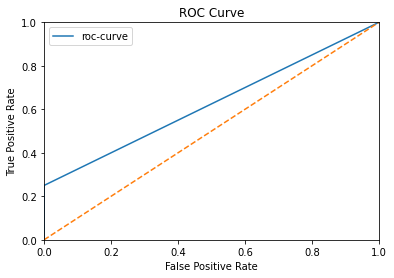

In [838]:
fig, ax = plt.subplots()

ax.set_title('ROC Curve')
ax.plot(fpr, tpr, label='roc-curve')
ax.plot([0, 1], [0, 1], linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_xlim([0.0, 1.0])
ax.set_ylabel('True Positive Rate')
ax.set_ylim([0.0, 1.0])
ax.legend()

**What are the important features**

In [839]:
# Getting top ranking features 
sums = count_train.sum(axis = 0) 
data = [] 
for col, term in enumerate(count_df.columns): 
    data.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("Words : \n", words.head(10)) 

Words : 
             term  rank
823         food   129
1533       place    88
899         good    68
2086        time    61
1182        like    58
1423     ordered    56
916        great    54
1120        just    48
1815     service    45
1700  restaurant    43


In [840]:
good_prob_sorted = nb_classifier.feature_log_prob_[1, :].argsort()
bad_prob_sorted = nb_classifier.feature_log_prob_[0, :].argsort()


**4. What are common words in bad reviews**

In [841]:
print("bad reviews: ",np.take(count_vectorizer.get_feature_names(), bad_prob_sorted[-40:]))

bad reviews:  ['price' 'took' 'flavor' 'wait' 'come' 'attitude' 'called' 'long' 'meal'
 'waitress' 'owner' 'nice' 'away' 'told' 'minutes' 'horrible' 'manager'
 'didn' 'fish' 'worst' 've' 'left' 'people' 'asked' 'got' 'came' 'going'
 'bad' 'really' 'order' 'restaurant' 'went' 'service' 'just' 'ordered'
 'like' 'good' 'time' 'place' 'food']


**5. What are common words in good review**

In [842]:
print("good reviews: ", np.take(count_vectorizer.get_feature_names(), good_prob_sorted[-10:]),'\n')


good reviews:  ['service' 'amazing' 'pizza' 'good' 'place' 'best' 'chicken' 'delicious'
 'food' 'great'] 

